In [363]:
import pandas as pd
import numpy as np
import foursquare
import folium
from IPython.display import IFrame
from ipywidgets.embed import embed_minimal_html
CLIENT_ID='WBX0QW53DULYJV1LO1BB1BIGKZ44G5RS04VDGBGOYZW4TY0H'
CLIENT_SECRET='22Y31ENCPNK0ALN0R0MXTELQ1OGKTKRHQ03VRLJT401GXFAW'
foursquare_client = foursquare.Foursquare(client_id=CLIENT_ID, 
                               client_secret=CLIENT_SECRET, 
                               redirect_uri='http://fondu.com/oauth/authorize')


In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import requests

In [175]:
starbucks_location = foursquare_client.venues.search(params={
    'query': 'starbucks',                                                         
    'll': '37.7749, -122.4194'
})

In [176]:
SF_COORDINATES = (37.76, -122.45)

#####     

## Starbucks existing outlets in San Francisco
<hr/>

In [345]:
m = folium.Map(location=SF_COORDINATES, zoom_start=12)
for i, venue in enumerate(starbucks_location['venues'], 1):
    location = venue['location']
    folium.Marker(location=[location['lat'], location['lng']]).add_to(m)
m.save('existing_starbucks.html')
IFrame(src='existing_starbucks.html', width=700, height=500)

In [179]:
outlets_details = []
for venue in starbucks_location['venues']:
    outlet_detail = foursquare_client.venues(venue['id'])
    outlets_details.append(outlet_detail)

In [180]:
outlets_popularity = []
added_venue_id = []
for i, v in enumerate(outlets_details, 1):
    stats = v['venue']['stats']
    popularity = stats.get('checkinsCount', 0) + stats.get('tipCount', 0) + stats.get('usersCount', 0)
    if v['venue']['id'] not in added_venue_id:
        added_venue_id.append(v['venue']['id'])
        outlets_popularity.append({'id': v['venue']['id'], 
                                   'popularity_count': popularity, 
                                   'location': v['venue']['location']})

In [181]:
outlets_popularity = sorted(outlets_popularity, key=lambda x: -x['popularity_count'])

####     

### Map showing the outlet popularity index using bigger to the smaller circle. The bigger circle shows the highest popular, while smaller shows the least popular.

In [346]:
m = folium.Map(location=[37.7749, -122.4194], zoom_start=14)
for outlet in outlets_popularity:
    location = outlet['location']
    folium.CircleMarker(location=[location['lat'], location['lng']], 
                        radius=outlet['popularity_count'] * 0.01, 
                        weight=outlet['popularity_count'] * 0.25).add_to(m)
m.save('popular_starbucks.html')
IFrame(src='popular_starbucks.html', width=700, height=500)

####    

#### Prepare dataframe for further analysis

In [183]:
df_data = []
for outlet in outlets_popularity:
    df_data.append({'id': outlet['id'], 'Popularity Count': outlet['popularity_count'],
                   'Postal Code': outlet['location']['postalCode'], 'lat': outlet['location']['lat'],
                   'lng': outlet['location']['lng']})

In [184]:
outlet_dataframe = pd.DataFrame(df_data)
outlet_dataframe.shape

(30, 5)

In [185]:
outlet_dataframe

,Popularity Count,Postal Code,id,lat,lng
0,184,94103,431e2d80f964a5207c271fe3,37.784231,-122.403985
1,68,94103,4a7324d9f964a520aadb1fe3,37.787360,-122.403180
2,66,94109,4a47a834f964a520e6a91fe3,37.788567,-122.422220
3,60,94102,49ceab7df964a520705a1fe3,37.789148,-122.408452
4,55,94102,4a6a452ef964a52001cd1fe3,37.786170,-122.409060
5,55,94114,49fa1dc1f964a520c16d1fe3,37.760941,-122.434608
6,49,94118,49e5893bf964a520d6631fe3,37.786220,-122.453203
7,47,94110,4a1e071af964a520bb7b1fe3,37.762880,-122.410435
8,43,94102,49bee717f964a520f3541fe3,37.777090,-122.417298
9,42,94123,4a135140f964a520d3771fe3,37.797678,-122.430455


#### Lets explore top 3 outlets 

In [186]:
first_most_popular_outlet = outlet_dataframe.iloc[0]
second_most_popular_outlet = outlet_dataframe.iloc[1]
third_most_popular_outlet = outlet_dataframe.iloc[2]

In [187]:
first_venue_details = foursquare_client.venues.explore(params={'ll': '{}, {}'.format(first_most_popular_outlet.lat,
                                                                                    first_most_popular_outlet.lng), 
                                                               'radius': 250})
second_venue_details = foursquare_client.venues.explore(params={'ll': '{}, {}'.format(second_most_popular_outlet.lat,
                                                                                    second_most_popular_outlet.lng), 
                                                               'radius': 250})
third_venue_details = foursquare_client.venues.explore(params={'ll': '{}, {}'.format(third_most_popular_outlet.lat,
                                                                                    third_most_popular_outlet.lng), 
                                                               'radius': 250})

In [188]:
def get_nearby_category(data):
    near_by = []
    for area in data['groups'][0]['items']:
        near_by.append({
            'venue_id':area['venue']['id'], 
            'category': area['venue']['categories'][0]['pluralName'],
            'category_id': area['venue']['categories'][0]['id'],
            'lat': area['venue']['location']['lat'],
            'lng': area['venue']['location']['lng'],
        })
    return near_by

In [189]:
first_venue_nearby_category = get_nearby_category(first_venue_details)
second_venue_nearby_category = get_nearby_category(second_venue_details)
third_venue_nearby_category = get_nearby_category(third_venue_details)


In [213]:
top_nearby_category = first_venue_nearby_category + second_venue_nearby_category + third_venue_nearby_category
top_nearby_category = pd.DataFrame(top_nearby_category)

In [217]:
top_nearby_category.head()

,category,category_id,lat,lng,venue_id
0,Gardens,4bf58dd8d48988d15a941735,37.784809,-122.402549,49c94f32f964a52054581fe3
1,Grocery Stores,4bf58dd8d48988d118951735,37.785540,-122.405455,58a3a06dbbec6606e1b580a3
2,Burger Joints,4bf58dd8d48988d16c941735,37.784816,-122.403537,5010936ce4b0abd8740f8fb7
3,Tea Rooms,4bf58dd8d48988d1dc931735,37.784253,-122.402179,45e86d76f964a5206a431fe3
4,Art Museums,4bf58dd8d48988d18f941735,37.785484,-122.402451,45dc447bf964a52001431fe3


In [349]:
map = folium.Map(location=SF_COORDINATES, zoom_start=14)
for nearby in top_nearby_category.iterrows():
    lat, lng = nearby[1]['lat'], nearby[1]['lng']
    folium.CircleMarker(location=[lat, lng]).add_to(map)
map.save('nearby_location_category_cluster.html')
IFrame(src='nearby_location_category_cluster.html', width=700, height=500)

### Category above will be clustered around San Francisco. 

In [25]:
top_category

,Category,Category ID,Count
0,Boutiques,4bf58dd8d48988d104951735,4
1,Wine Shops,4bf58dd8d48988d119951735,4
2,Gyms or Fitness Centers,4bf58dd8d48988d175941735,4
3,Hotels,4bf58dd8d48988d1fa931735,3
4,Tea Rooms,4bf58dd8d48988d1dc931735,3
5,Coffee Shops,4bf58dd8d48988d1e0931735,3
6,Museums,4bf58dd8d48988d181941735,3
7,Gardens,4bf58dd8d48988d15a941735,2
8,Sushi Restaurants,4bf58dd8d48988d1d2941735,2
9,Music Venues,4bf58dd8d48988d1e5931735,2


####  
####  Plotting Boutique Location
####    

In [272]:
boutiques_location = foursquare_client.venues.search(params={
    'query': 'Boutique',                                                         
    'll': '37.7749, -122.4194'
})

In [351]:
m = folium.Map(location=SF_COORDINATES, zoom_start=12)
for i, venue in enumerate(boutiques_location['venues'], 1):
    location = venue['location']
    folium.Marker(location=[location['lat'], location['lng']]).add_to(m)
m.save('boutique_location.html')
IFrame(src='boutique_location.html', width=700, height=500)

####  
####  Plotting Wine Shop Location
####    

In [229]:
wine_shops_location = foursquare_client.venues.search(params={
    'query': 'wine shop',                                                         
    'll': '37.7749, -122.4194'
})

In [352]:
m = folium.Map(location=SF_COORDINATES, zoom_start=12)
for i, venue in enumerate(wine_shops_location['venues'], 1):
    location = venue['location']
    folium.Marker(location=[location['lat'], location['lng']]).add_to(m)
m.save('wine_shop_location.html')
IFrame(src='wine_shop_location.html', width=700, height=500)

####  
####  Plotting Gym Location
####    

In [232]:
gym_location = foursquare_client.venues.search(params={
    'query': 'gym',                                                         
    'll': '37.7749, -122.4194'
})

In [354]:
m = folium.Map(location=SF_COORDINATES, zoom_start=12)
for i, venue in enumerate(gym_location['venues'], 1):
    location = venue['location']
    folium.Marker(location=[location['lat'], location['lng']]).add_to(m)
m.save('gym_location.html')
IFrame(src='gym_location.html', width=700, height=500)

####  
####  Plotting Hotel Location
####    

In [270]:
hotels_location = foursquare_client.venues.search(params={
    'query': 'Hotels',                                                         
    'll': '37.7749, -122.4194'
})

In [355]:
m = folium.Map(location=SF_COORDINATES, zoom_start=12)
for i, venue in enumerate(hotels_location['venues'], 1):
    location = venue['location']
    folium.Marker(location=[location['lat'], location['lng']]).add_to(m)
m.save('hotels_location.html')
IFrame(src='hotels_location.html', width=700, height=500)

###    
###  Get the location pointers for top 4 categories, which in combincation makes a popular area for starbucks outlet. 
###   

In [274]:
gyms = pd.DataFrame([{'lat': venue['location']['lat'],
              'lng': venue['location']['lng']} for venue in gym_location['venues']])
wine_shops = pd.DataFrame([{'lat': venue['location']['lat'],
              'lng': venue['location']['lng']} for venue in wine_shops_location['venues']])
boutiques = pd.DataFrame([{'lat': venue['location']['lat'],
              'lng': venue['location']['lng']} for venue in boutiques_location['venues']])
hotels = pd.DataFrame([{'lat': venue['location']['lat'],
              'lng': venue['location']['lng']} for venue in hotels_location['venues']])

### Clustering location using K-Means to find out the area having top 4 location nearby in San Francisco.

######     

In [304]:
def cluster(dframe, centroids_data):
    kmeans = KMeans(n_clusters=5).fit(dframe)
    centroids = kmeans.cluster_centers_
    centroids_data.extend(centroids)

    plt.scatter(dframe['lat'], dframe['lng'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.ylabel('LNG')
    plt.xlabel('LAT')
    plt.grid(True)

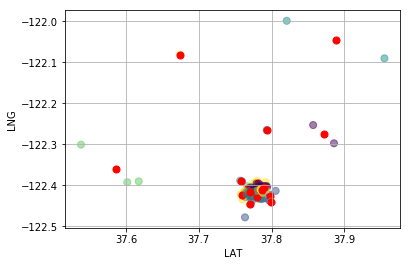

In [305]:
centroids_data = []
cluster(gyms, centroids_data)
cluster(wine_shops, centroids_data)
cluster(boutiques, centroids_data)
cluster(hotels, centroids_data)

####    
###  Above cluster shows that most of the location for top 4 category are clustered between LAT: 37.7 and 37.8, and LNG: -122.4 and -122.5  
####    

### Get all the centroid in the map

In [364]:
m = folium.Map(location=SF_COORDINATES, zoom_start=12)
for centroid in centroids_data:
    if 37.7 < centroid[0] < 37.8 and -122.4 > centroid[1] > -122.5:
        folium.Marker(location=centroid).add_to(m)
m.save('centroid.html')
IFrame(src='centroid.html', width=700, height=500)

###    
### Above map is generated based on the centroid data given by k-means algorithm. And these location are nearby or close to the top 4 location category. Which in turn giving starbucks a choice to pick one of the location for the new outlet. 
###   